In [83]:
from datetime import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import ground_motion_qh
from ground_motion_qh import plotting
from importlib import reload

In [47]:
pick_catalog_dir = Path(ground_motion_qh.__file__).parent.parent / 'results' / 'Yuriko' / 'Pick_catalog'
pick_catalog_dir

PosixPath('/home/neriberman/Repos/QuakeHack/GroundMotion_QH/results/Yuriko/Pick_catalog')

In [48]:
file_names = os.listdir(pick_catalog_dir)
file_names

['All_magnitude_minmag-1.0_CRY.csv',
 'All_magnitude_minmag-1.0_FRD.csv',
 'All_magnitude_minmag-1.0_KNW.csv',
 'All_magnitude_minmag-1.0_RRSP.csv',
 'All_magnitude_minmag-1.0_SND.csv',
 'All_magnitude_minmag-1.0_TRO.csv',
 'DailyEqNum_CRY.pdf',
 'DailyEqNum_FRD.pdf',
 'DailyEqNum_KNW.pdf',
 'DailyEqNum_RRSP.pdf',
 'DailyEqNum_SND.pdf',
 'DailyEqNum_TRO.pdf',
 'Supplement']

In [49]:
selected_file = [f for f in file_names if ('SND' in f) and f.endswith('.csv')][0]
selected_file

'All_magnitude_minmag-1.0_SND.csv'

In [50]:
selected_file_path = pick_catalog_dir / selected_file
selected_file_path

PosixPath('/home/neriberman/Repos/QuakeHack/GroundMotion_QH/results/Yuriko/Pick_catalog/All_magnitude_minmag-1.0_SND.csv')

In [185]:
picks_df = pd.read_csv(selected_file_path, index_col=0)
picks_df['epoch_time'] = pd.to_datetime(picks_df['time']).astype(np.int64) // 10**9
picks_df['amp_epoch_time'] = pd.to_datetime(picks_df['amp_time1']).astype(np.int64) // 10**9
picks_df['p_epoch_time'] = pd.to_datetime(picks_df['p_time']).astype(np.int64) // 10**9
picks_df['s_epoch_time'] = pd.to_datetime(picks_df['s_time']).astype(np.int64) // 10**9
picks_df

,id,time,pstime,mag,amp,p_prob,s_prob,mod_amp,amp_time1,p_time,s_time,epoch_time,amp_epoch_time,p_epoch_time,s_epoch_time
0,0,2015-01-01T14:15:51.158571Z,4.70,0.799862,1256.000000,0.753809,0.754133,0.050103,2015-01-01T14:16:02.120000Z,2015-01-01T14:15:56.530000Z,2015-01-01T14:16:01.230000Z,1420121751,1420121762,1420121756,1420121761
1,1,2015-01-03T02:31:17.498571Z,4.07,0.214340,613.000000,0.764219,0.779316,0.013012,2015-01-03T02:31:26.960000Z,2015-01-03T02:31:22.150000Z,2015-01-03T02:31:26.220000Z,1420252277,1420252286,1420252282,1420252286
2,2,2015-01-03T13:47:15.818571Z,3.51,1.441046,21441.000000,0.966709,0.536993,0.550866,2015-01-03T13:47:23.640000Z,2015-01-03T13:47:19.830000Z,2015-01-03T13:47:23.340000Z,1420292835,1420292843,1420292839,1420292843
3,3,2015-01-04T01:24:45.880000Z,3.08,0.275889,760.000000,0.755180,0.542945,0.037661,2015-01-04T01:24:52.560000Z,2015-01-04T01:24:49.400000Z,2015-01-04T01:24:52.480000Z,1420334685,1420334692,1420334689,1420334692
4,4,2015-01-04T17:03:43.710000Z,5.46,0.976539,1574.033156,0.756288,0.528715,0.037717,2015-01-04T17:03:48.940000Z,2015-01-04T17:03:49.950000Z,2015-01-04T17:03:55.410000Z,1420391023,1420391028,1420391029,1420391035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6257,2078,2024-07-29T09:13:06.932857Z,3.27,0.492311,525.000000,0.880130,0.778137,0.061988,2024-07-29T09:13:14.180000Z,2024-07-29T09:13:10.670000Z,2024-07-29T09:13:13.940000Z,1722244386,1722244394,1722244390,1722244393
6258,2079,2024-07-30T07:30:50.088571Z,2.11,0.006268,1909.000000,0.951642,0.716906,0.032082,2024-07-30T07:30:54.790000Z,2024-07-30T07:30:52.500000Z,2024-07-30T07:30:54.610000Z,1722324650,1722324654,1722324652,1722324654
6259,2080,2024-07-30T21:37:20.045714Z,6.26,1.405627,1003.869735,0.909263,0.710355,0.063919,2024-07-30T21:37:26.190000Z,2024-07-30T21:37:27.200000Z,2024-07-30T21:37:33.460000Z,1722375440,1722375446,1722375447,1722375453
6260,2081,2024-07-31T06:28:04.590000Z,6.23,0.949309,792.000000,0.864167,0.608441,0.035425,2024-07-31T06:28:18.230000Z,2024-07-31T06:28:11.710000Z,2024-07-31T06:28:17.940000Z,1722407284,1722407298,1722407291,1722407297


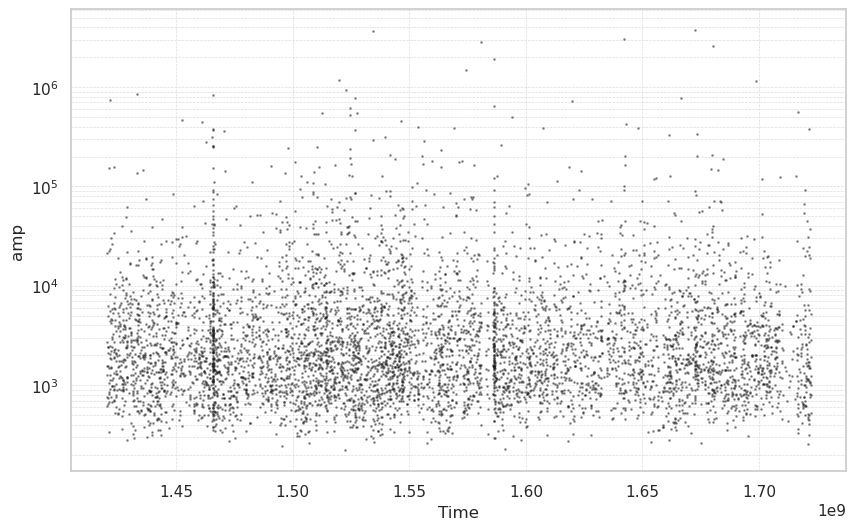

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))
column = 'amp'
bottom = 0
# markers, stems, _ = ax.stem(
#         picks_df.iloc[:1000]["epoch_time"],
#         picks_df.iloc[:1000][column],
#         markerfmt=".",
#         bottom=bottom,
#     )
# plt.setp(stems, linewidth=0.5, alpha=0.5)
# plt.setp(markers, markersize=0.5, alpha=0.5)

_ = ax.scatter(
        picks_df["amp_epoch_time"],
        picks_df[column],
        s=3.8,
        c='k',
        alpha=0.4,
        marker=".",
    )

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Time")
ax.set_ylabel(column)
ax.set_yscale("log")

In [191]:
DEF_FORECAST_WIN_SEC = 10*60*24*7 # 1 week in seconds
def create_pairs(
    df,
    trigger_column='amp',
    forecast_column='amp',
    trigger_threshold=-np.inf,
    sequential=False,
    trigger_time_column='p_epoch_time',
    forecast_time_column='amp_epoch_time',
    mid_buffer=60,
    forecast_window=DEF_FORECAST_WIN_SEC
    ):

  col_values = df[trigger_column].values
  trigger_values = col_values[:-1]
  trigger_times = df[trigger_time_column].values[:-1]
  trigger_boolean = trigger_values > trigger_threshold

  forecast_values = []
  time_differences_sec = []
  for t in trigger_times[trigger_boolean]:
    if sequential:
      following_trigger_bool = df[forecast_time_column].values > t
      forecast_val = df[forecast_column].values[following_trigger_bool][0]
      time_diff = df[forecast_time_column].values[following_trigger_bool][0] - t
    else:
      first_index = np.searchsorted(df[forecast_time_column].values, t + mid_buffer, side='left')
      last_index = np.searchsorted(df[forecast_time_column].values, t + mid_buffer + forecast_window, side='left')
      time_slice = slice(first_index, last_index)
      if last_index > first_index:
        forecast_val = np.max(df[trigger_column].values[time_slice])
        forecast_val_slice_idx = np.argmax(df[forecast_column].values[time_slice])
        time_diff = df[trigger_time_column].values[time_slice][forecast_val_slice_idx] - t
      else:
        forecast_val = np.nan
        time_diff = np.nan
    forecast_values.append(forecast_val)
    time_differences_sec.append(time_diff)
  pairs_array = np.array([trigger_values[trigger_boolean], forecast_values]).T
  time_differences_sec = np.array(time_differences_sec)

  return pairs_array, time_differences_sec

In [207]:
%pdb 1
pairs_array, time_differences_sec = create_pairs(
    picks_df,
    trigger_column='amp',
    forecast_column='amp',
    trigger_threshold=-np.inf,
    sequential=False,
    trigger_time_column='p_epoch_time',
    forecast_time_column='amp_epoch_time',
    mid_buffer=60*30,
    # forecast_window=DEF_FORECAST_WIN_SEC,
    forecast_window=60*60*24,
)

Automatic pdb calling has been turned ON


In [208]:
pairs_array

array([[ 1256.        ,            nan],
       [  613.        , 21441.        ],
       [21441.        ,   760.        ],
       ...,
       [ 1909.        ,  1003.86973514],
       [ 1003.86973514,  2846.        ],
       [  792.        ,  2846.        ]], shape=(6261, 2))

In [209]:
time_differences_sec

array([   nan, 40557., 41850., ..., 50795., 44773., 12929.], shape=(6261,))

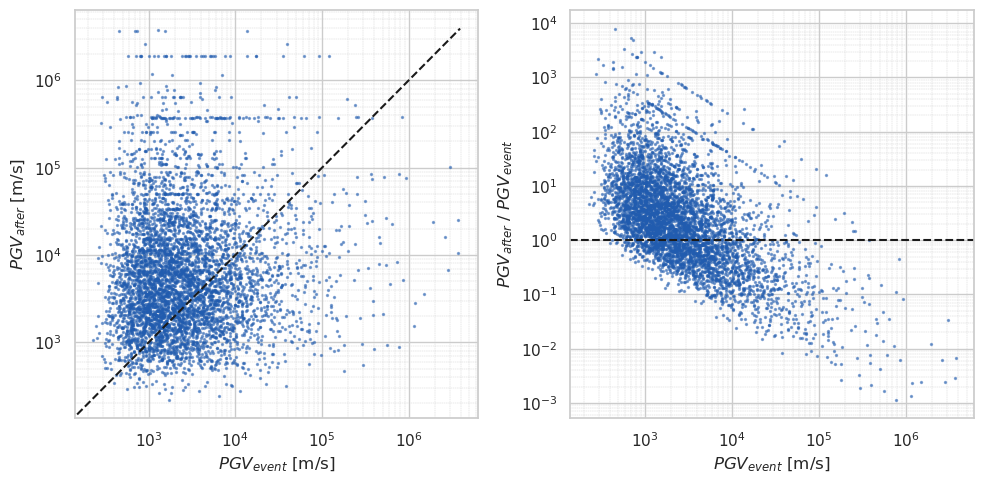

In [210]:
f, ax = plotting.scatter_post_ratio_vs_apre(pairs_array[:, 0], pairs_array[:, 1])

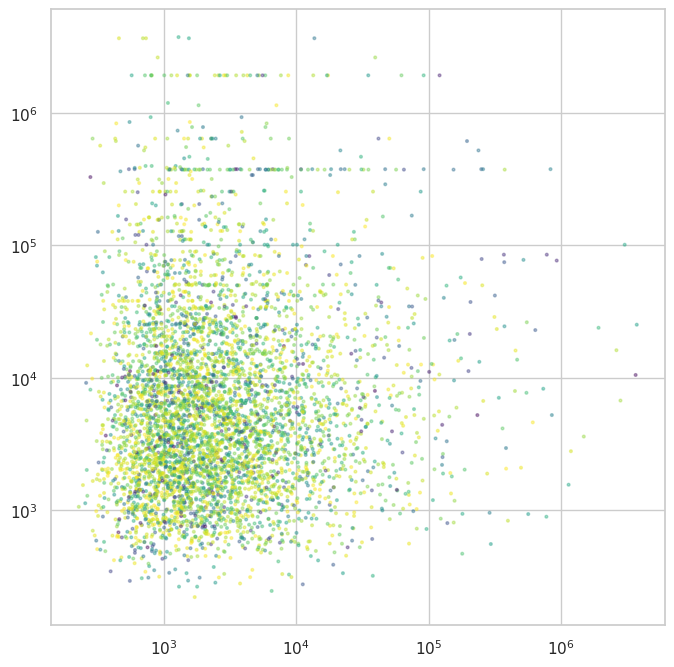

In [211]:
f, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
  pairs_array[:, 0],
  pairs_array[:, 1],
  s=3.8,
  c=np.log(time_differences_sec),
  cmap='viridis',
  alpha=0.4,
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_aspect('equal', adjustable='box')

156639.0


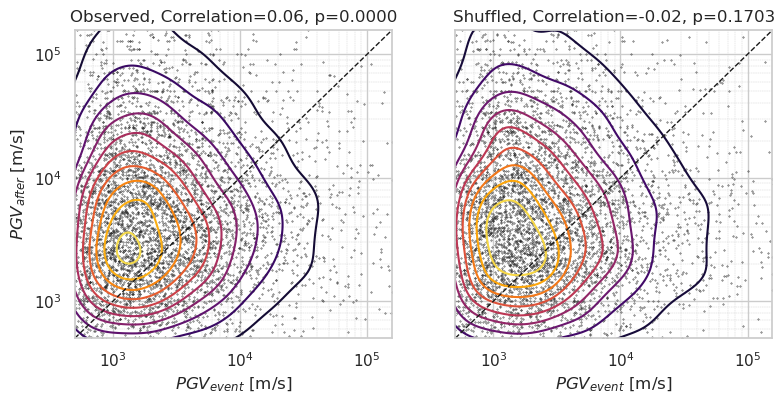

In [212]:
fig, ax = plotting.scatter_pre_vs_post(
    pairs_array[:, 0],
    pairs_array[:, 1],
    add_corr=True
)

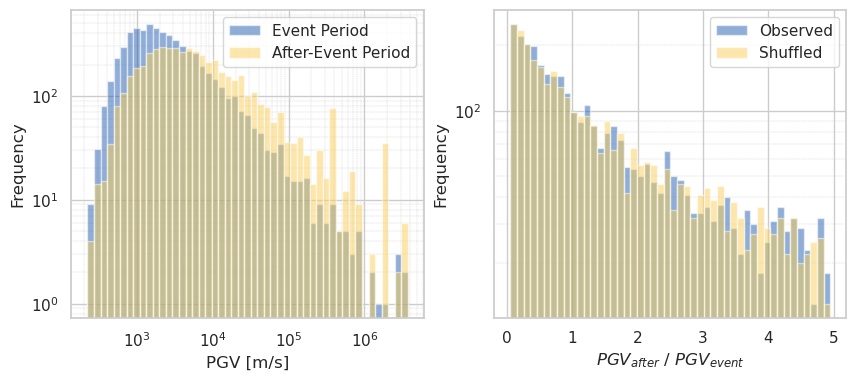

In [213]:
fig, ax = plotting.hist_apre_apost(
    pairs_array[:, 0],
    pairs_array[:, 1],
    bins=50,
)

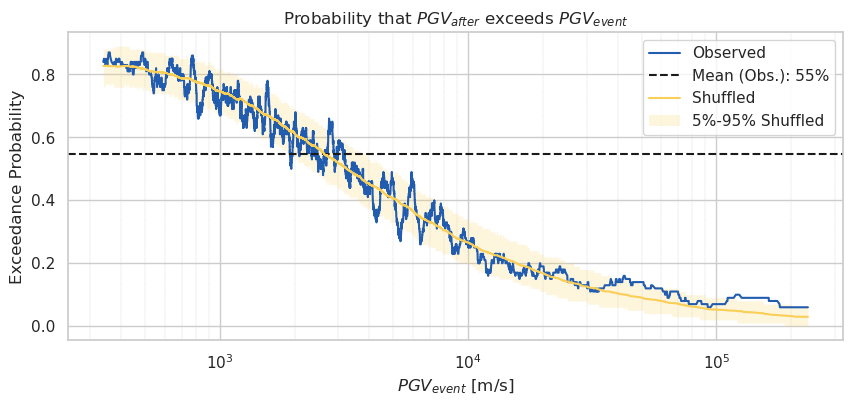

In [214]:
fig, ax = plotting.exceedance_plot(
    pairs_array[:, 0],
    pairs_array[:, 1],
    n_roll=100
)